<a href="https://colab.research.google.com/github/manasupes/Machine-Learning/blob/master/Feature_Engineering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Missing Values - Feature Engineering


In [1]:
import pandas as pd

In [2]:
from google.colab import files
uploaded = files.upload()


Saving train.csv to train.csv


In [3]:
df = pd.read_csv('train.csv')

In [4]:
df.head()

PassengerId  Survived  Pclass  ...     Fare Cabin  Embarked
0            1         0       3  ...   7.2500   NaN         S
1            2         1       1  ...  71.2833   C85         C
2            3         1       3  ...   7.9250   NaN         S
3            4         1       1  ...  53.1000  C123         S
4            5         0       3  ...   8.0500   NaN         S

[5 rows x 12 columns]

1. Missing Data Complete at Random


In [5]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [6]:
df[df['Embarked'].isnull()]

PassengerId  Survived  Pclass  ...  Fare Cabin  Embarked
61            62         1       1  ...  80.0   B28       NaN
829          830         1       1  ...  80.0   B28       NaN

[2 rows x 12 columns]

2. Missing Data Not at Random(MNAR): Systematic missing Values

In [7]:
import numpy as np 
df['cabin_null'] = np.where(df['Cabin'].isnull(),1,0)

##Find the percentage of null values
df['cabin_null'].mean()

0.7710437710437711

In [8]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'cabin_null'],
      dtype='object')

In [9]:
df['cabin_null']

0      1
1      0
2      1
3      0
4      1
      ..
886    1
887    0
888    1
889    0
890    1
Name: cabin_null, Length: 891, dtype: int64

In [10]:
df.groupby(['Survived'])['cabin_null'].mean()

Survived
0    0.876138
1    0.602339
Name: cabin_null, dtype: float64

Survided = 1 : 60%
Not Survived = 0 : 87%

3. Missing At Random(MAR)


* Men = Hide their Salary
* Women = Hide their Age





In [11]:
'''### All the techniques of handling missing values
1. Mean/Median/Mode replacement
2. Random Sample Imputation
3. Capturing NAN values with a new feature
4. End of Distribution Imputation
5. Arbitrary Imputation
6. Frequent categories Imputation
'''

'### All the techniques of handling missing values\n1. Mean/Median/Mode replacement\n2. Random Sample Imputation\n3. Capturing NAN values with a new feature\n4. End of Distribution Imputation\n5. Arbitrary Imputation\n6. Frequent categories Imputation\n'

### Mean/Median/Mode imputation 
When Should we apply this ?
Mean/Median imputation has the assumption that the data are missing completely at random(MCAR).
We Solve this by replacing the NAN by the most frequent occurance of the variables.

In [16]:
df = pd.read_csv('train.csv', usecols=['Age', 'Fare','Survived' ])
df.head()

Survived   Age     Fare
0         0  22.0   7.2500
1         1  38.0  71.2833
2         1  26.0   7.9250
3         1  35.0  53.1000
4         0  35.0   8.0500

In [17]:
df.isnull().mean()

Survived    0.000000
Age         0.198653
Fare        0.000000
dtype: float64

In [18]:
def impute_nan(df, variable, median):
  df[variable+"_median"] = df[variable].fillna(median)

In [19]:
median = df.Age.median()
median

28.0

In [20]:
impute_nan(df, 'Age', median)
df.head()

Survived   Age     Fare  Age_median
0         0  22.0   7.2500        22.0
1         1  38.0  71.2833        38.0
2         1  26.0   7.9250        26.0
3         1  35.0  53.1000        35.0
4         0  35.0   8.0500        35.0

In [21]:
print(df['Age'].std())
print(df['Age_median'].std())

14.526497332334044
13.019696550973194


In [22]:
import matplotlib.pyplot as plt


In [23]:
%matplotlib inline

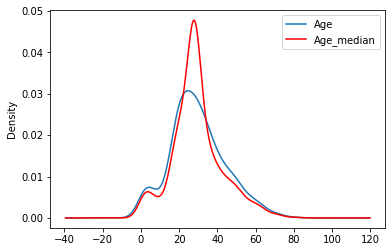

In [24]:
fig = plt.figure()
ax = fig.add_subplot(111)
df['Age'].plot(kind='kde', ax=ax)
df.Age_median.plot(kind='kde', ax=ax, color='red')
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')
#kde = kernel density estimator

**Advantages and Disadvantages of Mean/Median Imputation**

***Advantages:***
1. Easy to Implement(Robust to outliers).
2. Faster way to obtain the complete dataset.

***Disadvantages***
1. Change of Distortion in the original variance of the data 
2. Impacts Correlation